<a href="https://colab.research.google.com/github/mdaugherity/Numerical2024/blob/main/roots/Week_3_Root_Finding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ROOT FINDING Examples
## PHYS 351, Fall 2022
##  Dr. Daugherity, Abilene Christian University
Solving NON-linear equations.  For any equation you can subtract the right side from the left side and finding the x that makes it zero.   

*Example*:  Instead of $x^2=4$ find $x$ that makes $x^2-4=0$

This notebook demonstrates 3 common algorithms for root finding, then shows the built-in method using scipy.root_scalar



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Define a function to find roots for:

 $f(x)=0$
   

In [ ]:
def f(x):
  return 5-x  # a difficult equation, the solution is x=5

## Bisection version 1 - simple loop

In [ ]:
xl = 1
xr = 10
fl = f(xl)
fr = f(xr)

STEPS = 20
print(f"{'i':3}{'left':20}{'mid':20}{'right':20}")
for i in range(STEPS):
  xm = (xl+xr)/2
  fm = f(xm)
  print(f"{i:<3}{xl:<20}{xm:<20}{xr:<20}")
  if fl*fm<0:  # left and mid have diff signs
    xr = xm  # root between xl and xm
    fr = fm
  else:
    xl = xm  # root between xm and xr
    fl = fm

print('\nroot is between:',xl,' and ', xr)

i  left                mid                 right               
0  1                   5.5                 10                  
1  1                   3.25                5.5                 
2  3.25                4.375               5.5                 
3  4.375               4.9375              5.5                 
4  4.9375              5.21875             5.5                 
5  4.9375              5.078125            5.21875             
6  4.9375              5.0078125           5.078125            
7  4.9375              4.97265625          5.0078125           
8  4.97265625          4.990234375         5.0078125           
9  4.990234375         4.9990234375        5.0078125           
10 4.9990234375        5.00341796875       5.0078125           
11 4.9990234375        5.001220703125      5.00341796875       
12 4.9990234375        5.0001220703125     5.001220703125      
13 4.9990234375        4.99957275390625    5.0001220703125     
14 4.99957275390625    4.999847412109375

## VERSION 2 - Define max error tolerance

Notice that machine precision means we can't get errors smaller than $10^{-15}$ reliably.   

In [ ]:
xl = 1
xr = 10
fl = f(xl)
fr = f(xr)
err = xr-xl
tol = 1e-10  # max error goal
print(f"{'err':^25}{'left':^25}{'mid':^25}{'right':^25}")
while err>tol:
  xm = (xl+xr)/2
  fm = f(xm)

  if fl*fm<0:  # left and mid have diff signs
    xr = xm  # root between xl and xm
    fr = fm
  else:
    xl = xm  # root between xm and xr
    fl = fm
  err = xr-xl
  #print(f"{err:25}{xl:25}{xm:25}{xr:25}")
  #print(f"{err:<25}{xl:<25}{xm:<25}{xr:<25}")
  print(f"{err:25.15e}{xl:25.15f}{xm:25.15f}{xr:25.15f}")

print('root is between:',xl,' and ', xr)


           err                     left                      mid                     right          
    4.500000000000000e+00        1.000000000000000        5.500000000000000        5.500000000000000
    2.250000000000000e+00        3.250000000000000        3.250000000000000        5.500000000000000
    1.125000000000000e+00        4.375000000000000        4.375000000000000        5.500000000000000
    5.625000000000000e-01        4.937500000000000        4.937500000000000        5.500000000000000
    2.812500000000000e-01        4.937500000000000        5.218750000000000        5.218750000000000
    1.406250000000000e-01        4.937500000000000        5.078125000000000        5.078125000000000
    7.031250000000000e-02        4.937500000000000        5.007812500000000        5.007812500000000
    3.515625000000000e-02        4.972656250000000        4.972656250000000        5.007812500000000
    1.757812500000000e-02        4.990234375000000        4.990234375000000        5.007812

In [ ]:
# guess interval sizes
L = 1 # initial length
for n in range(50):
  print(f"{n}\t{L/2**n}")

0	1.0
1	0.5
2	0.25
3	0.125
4	0.0625
5	0.03125
6	0.015625
7	0.0078125
8	0.00390625
9	0.001953125
10	0.0009765625
11	0.00048828125
12	0.000244140625
13	0.0001220703125
14	6.103515625e-05
15	3.0517578125e-05
16	1.52587890625e-05
17	7.62939453125e-06
18	3.814697265625e-06
19	1.9073486328125e-06
20	9.5367431640625e-07
21	4.76837158203125e-07
22	2.384185791015625e-07
23	1.1920928955078125e-07
24	5.960464477539063e-08
25	2.9802322387695312e-08
26	1.4901161193847656e-08
27	7.450580596923828e-09
28	3.725290298461914e-09
29	1.862645149230957e-09
30	9.313225746154785e-10
31	4.656612873077393e-10
32	2.3283064365386963e-10
33	1.1641532182693481e-10
34	5.820766091346741e-11
35	2.9103830456733704e-11
36	1.4551915228366852e-11
37	7.275957614183426e-12
38	3.637978807091713e-12
39	1.8189894035458565e-12
40	9.094947017729282e-13
41	4.547473508864641e-13
42	2.2737367544323206e-13
43	1.1368683772161603e-13
44	5.684341886080802e-14
45	2.842170943040401e-14
46	1.4210854715202004e-14
47	7.105427357601002e-15


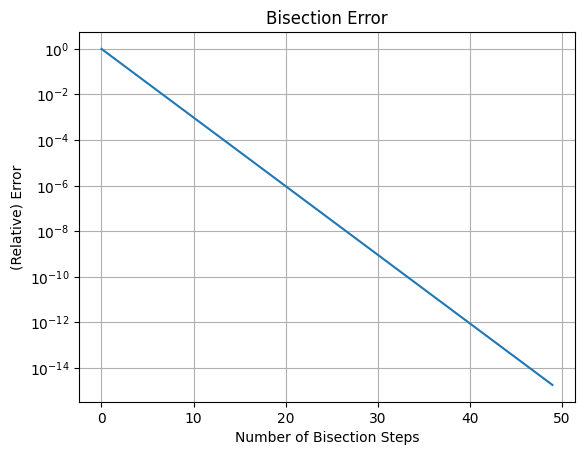

In [ ]:
N = np.arange(50)
L0 = 1 #initial length
L = (L0/2)**N
plt.semilogy(N,L)
plt.grid()
plt.xlabel('Number of Bisection Steps')
plt.ylabel('(Relative) Error')
plt.title('Bisection Error')
plt.show()

# Newton-Raphson
Example of root finding using the Newton-Raphson.  This algorithm converges faster than bisection, but it requires knowing the derivative and is **not** guaranteed to converge

In [ ]:
def f(x):
  return x**2 + 4*x + 4

In [ ]:
def fprime(x):
  return 2*x+4

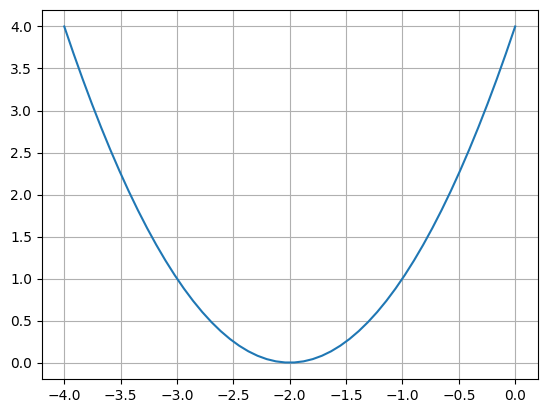

In [ ]:
x = np.linspace(-4,0)
plt.plot(x, f(x))
plt.grid()

In [ ]:
# ONE STEP
xold = -3
xnew = xold - f(xold)/fprime(xold)

print('Initial Guess = ',xold)
print('next guess is xnew =', xnew)

Initial Guess =  -3
next guess is xnew = -2.5


In [ ]:
# MANY STEPS
STEPS = 10
xold = -3
print('Initial Guess = ',xold)

for i in range(STEPS):
  xnew = xold - f(xold)/fprime(xold)
  print('next guess is xnew =', xnew)
  xold = xnew

Initial Guess =  -3
next guess is xnew = -2.5
next guess is xnew = -2.25
next guess is xnew = -2.125
next guess is xnew = -2.0625
next guess is xnew = -2.03125
next guess is xnew = -2.015625
next guess is xnew = -2.0078125
next guess is xnew = -2.00390625
next guess is xnew = -2.001953125
next guess is xnew = -2.0009765625


# SECANT METHOD

In [ ]:
x0 = -3
x1 = x0 + 1e-3

STEPS = 10
print('Initial Guesses = ',x0,x1)

for i in range(STEPS):
  dem = f(x1)-f(x0)
  x2 = x1 - f(x1)*(x1-x0)/dem
  print('next guess is x2 =', x2)
  x0 = x1
  x1 = x2



Initial Guesses =  -3 -2.999
next guess is x2 = -2.4997498749374336
next guess is x2 = -2.3331110370123223
next guess is x2 = -2.1998799519807806
next guess is x2 = -2.1249218456921293
next guess is x2 = -2.076875721431314
next guess is x2 = -2.0475895579268237
next guess is x2 = -2.029393591667401
next guess is x2 = -2.018170574219251
next guess is x2 = -2.0112290088348472
next guess is x2 = -2.006940150752016


# ROOT_SCALAR
How to use root_scalar
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root_scalar.html


In [ ]:
def f(x):
  return x**2 - 4

In [ ]:
def fprime(x):
  return 2*x

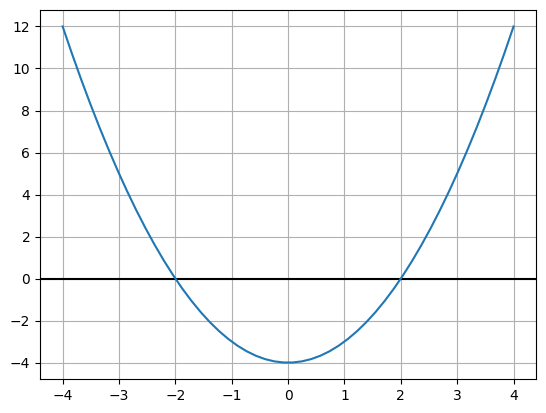

In [ ]:
x = np.linspace(-4,4)
plt.axhline(0,color='k')
plt.plot(x,f(x))
plt.grid()

In [ ]:
from scipy.optimize import root_scalar

In [ ]:
root_scalar(f, bracket=[0, 4] )    # use brackets

      converged: True
           flag: converged
 function_calls: 10
     iterations: 9
           root: 2.0
         method: brentq

In [ ]:
sol = root_scalar(f, bracket=[0, 10] )    # use brackets
x = sol.root  # the root
print(x)

2.0


In [ ]:
sol.root

2.0

In [ ]:
root_scalar(f, fprime=fprime, x0=-4 )    # use derivatives

      converged: True
           flag: converged
 function_calls: 12
     iterations: 6
           root: -2.0
         method: newton

In [ ]:
root_scalar(f, fprime=fprime, x0=0 )    # use derivatives, watch for zeros!!!!!

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_root_scalar.py:315: RuntimeWarning: Derivative was zero.
  r, sol = methodc(f, x0, args=args, fprime=fprime, fprime2=None,


      converged: False
           flag: convergence error
 function_calls: 2
     iterations: 1
           root: 0.0
         method: newton

In [ ]:
sol = root_scalar(f, fprime=fprime, x0=0 )    # use derivatives
x = sol.root
print('root = ',x)
if sol.converged==False:
  print('*****************WARNING!!!!!!***********')
print(sol)

root =  0.0
*****************WARNING!!!!!!***********
      converged: False
           flag: convergence error
 function_calls: 2
     iterations: 1
           root: 0.0
         method: newton


In [ ]:
root_scalar(f,x0=-4, x1=-2.5 )    # use two guesses

      converged: True
           flag: converged
 function_calls: 7
     iterations: 6
           root: -2.000000000000058
         method: secant

In [ ]:
x0 = -4 # initial guess
root_scalar(f,x0=x0, x1=x0+1e-4)    # use two guesses

      converged: True
           flag: converged
 function_calls: 8
     iterations: 7
           root: -2.0000000000000004
         method: secant

In [ ]:
x0 = -4 # initial guess
root_scalar(f,x0=x0, x1=x0+1e-4,xtol=1e-4)    # use two guesses

      converged: True
           flag: converged
 function_calls: 7
     iterations: 6
           root: -2.000000000382294
         method: secant

# PRACTICE

In [ ]:
import numpy as np

In [ ]:
from scipy.optimize import root_scalar

In [ ]:
def f(x):  # function root_scalar will make zero
  return x-10

In [ ]:
sol = root_scalar(f, bracket=[5,15])
print(sol)

      converged: True
           flag: converged
 function_calls: 3
     iterations: 2
           root: 10.0
         method: brentq


In [ ]:
print('The answer is x=', sol.root)

The answer is x= 10.0
